# 项目：用逻辑回归预测泰坦尼克号幸存情况

## 分析目标

此数据分析报告的目的是，基于泰坦尼克号乘客的性别和船舱等级等属性，对幸存情况进行逻辑回归分析，从而能利用得到的模型，对未知幸存情况的乘客，根据属性预测是否从沉船事件中幸存。

## 简介

> 泰坦尼克号（英语：RMS Titanic）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

> 泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。

数据集包括两个数据表：`titianic_train.csv`和`titanic_test.csv`。

`titianic_train.csv`记录了超过八百位泰坦尼克号乘客在沉船事件后的幸存情况，以及乘客的相关信息，包括所在船舱等级、性别、年龄、同乘伴侣/同胞数量、同乘父母/孩子数量，等等。

`titanic_test.csv`只包含乘客（这些乘客不在`titianic_train.csv`里）相关信息，此文件可以被用于预测乘客是否幸存。

`titianic_train.csv`每列的含义如下：
- PassengerId：乘客ID
- survival：是否幸存
   - 0	否
   - 1	是
- pclass：船舱等级
   - 1	一等舱
   - 2	二等舱
   - 3  三等舱
- sex：性别
- Age：年龄
- sibsp：同乘伴侣/同胞数量
- parch：同乘父母/孩子数量
- ticket：船票号
- fare：票价金额
- cabin：船舱号
- embarked：登船港口
   - C  瑟堡
   - Q  皇后镇
   - S  南安普敦
   
   
`titianic_test.csv`每列的含义和上面相同，但不具备survival变量的数据，即是否幸存。

# 读取数据

导入需要的模块，使用pd.read_csv读取文件

In [1]:
import pandas as pd
import numpy as np

In [2]:
original_titanic_train = pd.read_csv("titanic_train.csv")
original_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 评估和清洗数据

这一部分将对original_titanic_train所包含的数据进行评估和清洗。
主要从两个方面进行：结构和内容，即整齐度和干净度。
数据的结构性问题指不符合“每个变量为一列，每个观察值为一行，每种类型的观察单位为一个单元格。”这三个标准；
数据内容性问题包括存在缺失数据、重复数据、无效数据等。
为了区分原始数据与清理数据，将创建一个新的dataframe名为cleaned_titanic_train，是original_titanic_train的一个副本，清洗操作都在cleaned_titanic_train上进行。

In [3]:
cleaned_titanic_train = original_titanic_train.copy()

In [4]:
cleaned_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


从前5行数据来看，不存在数据结构性问题

## 数据干净度

通过info查看cleaned_titanic_train对内容进行大致了解

In [5]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


全部数据有891条观察值，其中Age、Cabin、Embarked存在缺失值。

数据类型方面，PassengerId表示乘客ID，数据类型不应为数字，应为字符串，所以需要进行数据格式转换。

Survived 、Pclass、Embarked 、Sex为分类变量，可以转换为catogory

In [6]:
cleaned_titanic_train['PassengerId'] = cleaned_titanic_train['PassengerId'].astype('str')

In [7]:
cleaned_titanic_train[['Survived','Pclass','Embarked','Sex']] = cleaned_titanic_train[['Survived','Pclass','Embarked','Sex']].astype('category')


In [8]:
cleaned_titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    object  
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(2), object(4)
memory usage: 59.8+ KB


## 处理缺失数据

Age、Cabin、Embarked存在缺失值。

age(年龄)可以用平均值取代。

Cabin、Embarked缺失值可以不处理。

In [9]:
cleaned_titanic_train[cleaned_titanic_train['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


有177条缺失，占比20%左右。

In [10]:
age_mean = cleaned_titanic_train['Age'].mean()
cleaned_titanic_train['Age'].fillna(age_mean, inplace=True)
print(cleaned_titanic_train['Age'].head(18))
print(cleaned_titanic_train['Age'].isna().sum())

0     22.000000
1     38.000000
2     26.000000
3     35.000000
4     35.000000
5     29.699118
6     54.000000
7      2.000000
8     27.000000
9     14.000000
10     4.000000
11    58.000000
12    20.000000
13    39.000000
14    14.000000
15    55.000000
16     2.000000
17    29.699118
Name: Age, dtype: float64
0


C:\Users\19338\AppData\Local\Temp\ipykernel_23376\3200189283.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_titanic_train['Age'].fillna(age_mean, inplace=True)


In [11]:
cleaned_titanic_train[cleaned_titanic_train['Cabin'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.000000,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.000000,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S


有687条观察值的船舱号变量缺失，说明船舱号数据在大部分观察值中都是未知的，所以不能删除这些观察值。

此外，我们认为船舱号并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

In [12]:
cleaned_titanic_train[cleaned_titanic_train['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


仅有两条观察值的登船港口变量缺失，但我们认为登船港口并不是影响生还概率的关键因素，不会被纳入逻辑回归的自变量内，即使缺失也不会影响建立模型，因此可以保留这些观察值。

## 处理重复数据

根据数据变量的含义以及内容来看，PassengerId是乘客的唯一标识符，不应该存在重复，因此查看是否存在重复值。

In [13]:
cleaned_titanic_train.duplicated().sum()

0

输出结果为0，说明不存在重复值。

## 处理不一致数据

不一致数据可能存在于所有分类变量中，我们要查看是否存在不同值实际指代同一目标的情况。

In [14]:
print(cleaned_titanic_train['Survived'].value_counts())
print(cleaned_titanic_train['Pclass'].value_counts())
print(cleaned_titanic_train['Sex'].value_counts())
print(cleaned_titanic_train['Embarked'].value_counts())



Survived
0    549
1    342
Name: count, dtype: int64
Pclass
3    491
1    216
2    184
Name: count, dtype: int64
Sex
male      577
female    314
Name: count, dtype: int64
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


从以上输出看，均不存在不一致数据。

## 处理无效或错误数据

通过describe函数对dataframe的数值统计数据进行快速了解

In [15]:
cleaned_titanic_train.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,13.002015,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.910400
50%,29.699118,0.000000,0.000000,14.454200
75%,35.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


乘客年龄平均为30岁左右，最大值为80岁，最小值为0.42岁。同乘伴侣/同胞数量最大值为8个，最小为0个。同乘父母/孩子数量最大值为6个，最小值为0个。船票价格平均为32元，最大值为512元，最小值为0元，猜测0元表示增票。数据不存在脱离现实的数值。

# 整理数据

对数据的整理，与分析方向紧密相关。此次数据分析目标是，根据泰坦尼克号乘客的相关信息，预测沉船事件发生后的生还概率。

数据变量包含乘客同乘伴侣/同胞数量，以及同乘父母/孩子数量，这些可以帮助计算出船上家庭成员的数量。我们对同乘家庭成员数量是否会显著影响幸存感兴趣，因此可以创建一个新的变量，记录这一数值。

In [16]:
cleaned_titanic_train['familynum'] = cleaned_titanic_train['SibSp'] \
+ cleaned_titanic_train['Parch']

cleaned_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familynum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# 探索数据

在进行逻辑回归之前，我们可以借助数据可视化，探索数值变量的分布，以及与乘客是否幸存存在相关性的变量，为后续进一步分析提供方向。

导入数据可视化需要的库

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 设置图表色盘为"pastel"
sns.set_palette("pastel")

In [19]:
# 设置图表尺寸
plt.rcParams["figure.figsize"] = [7,3.5]
plt.rcParams["figure.autolayout"] = True

## 幸存比例

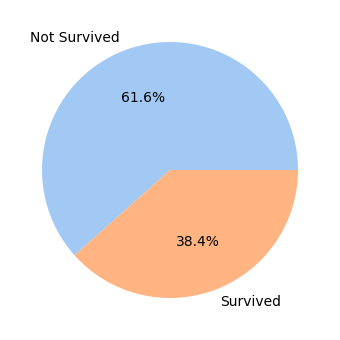

In [20]:
survived_count = cleaned_titanic_train["Survived"].value_counts()

survived_label = survived_count.index


labels = ['Not Survived', 'Survived']

plt.pie(survived_count, labels=labels, autopct='%.1f%%')
plt.show()


从以上饼图来看，泰坦尼克号遇难乘客多于幸存乘客，比例约为3:2。

## 乘客年龄

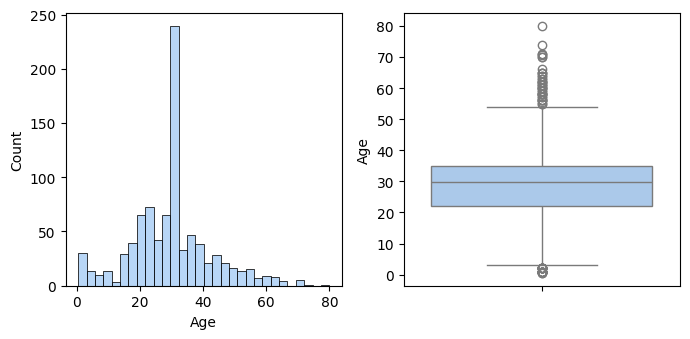

In [21]:
figure,axes = plt.subplots(1,2)
sns.histplot(data=cleaned_titanic_train,x="Age",ax=axes[0])
sns.boxplot(data=cleaned_titanic_train,y="Age",ax=axes[1])
plt.show()

大多数乘客年龄在20到40岁之间，但有不少老年乘客以及婴儿。

## 年龄与是否幸存

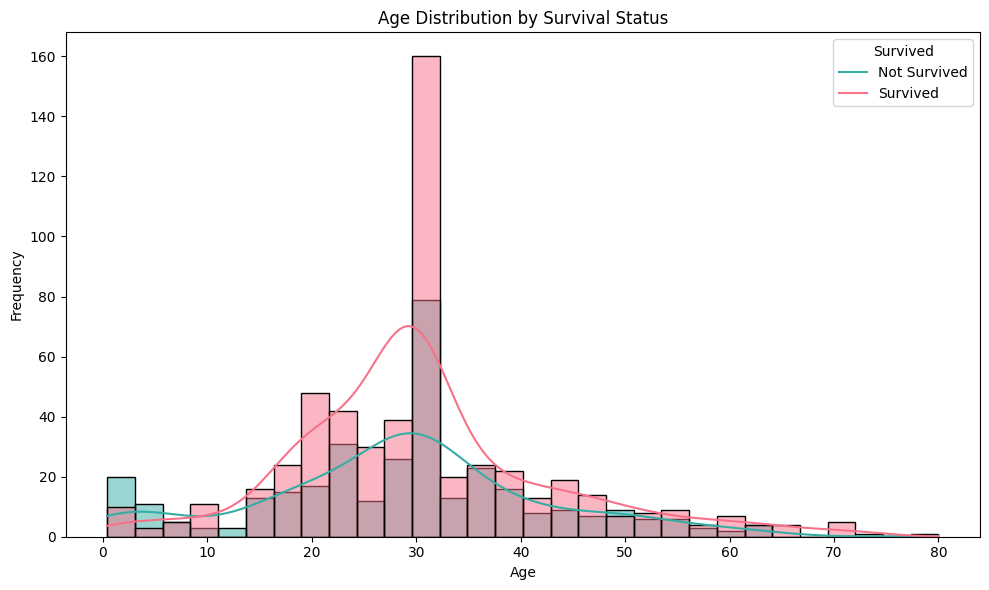

In [22]:
plt.figure(figsize=(10, 6))
sns.histplot(data=cleaned_titanic_train, x='Age', hue='Survived', bins=30, kde=True, palette='husl')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.title('Age Distribution by Survival Status')
plt.show()

## 登船港口与是否幸存的关系

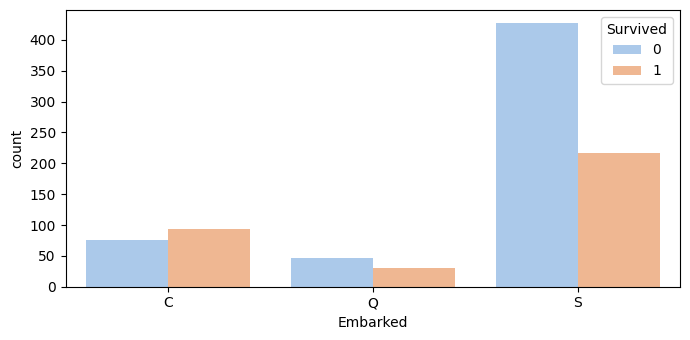

In [23]:
sns.countplot(data=cleaned_titanic_train,x='Embarked',hue='Survived')
plt.show()

从是否幸存与登船港口之间的柱状图来看，瑟堡登船的乘客，幸存数量大于遇难数量，而皇后镇和南安普敦则相反。

# 分析数据

在分析步骤中，我们将利用以上清理后的数据，进行逻辑回归分析，目标是得到一个可以根据泰坦尼克号乘客各个属性来预测是否幸存的数学模型。

首先导入所需模块

In [24]:
import statsmodels.api as sm

然后创建一个新的DataFrame`lr_titanic_train`，让它作为进行连接回归分析所用的数据

和`cleaned_titanic_train`区分开的原因是，我们在进行回归分析前，还可能需要对数据进行一些准备，比如引入虚拟变量，这些都可以在`lr_titanic_train`上执行。

In [25]:
lr_titanic_train = cleaned_titanic_train.copy()
lr_titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familynum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


移除不会影响乘客是否幸存的变量

In [26]:
lr_titanic_train = lr_titanic_train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
lr_titanic_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,familynum
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,0


数据里还存在分类变量，需要引入虚拟变量来表示

In [27]:
lr_titanic_train = pd.get_dummies(lr_titanic_train,columns=['Sex','Pclass','Embarked']\
                                  ,dtype=int,drop_first=True)
lr_titanic_train.head()

,Survived,Age,SibSp,Parch,Fare,familynum,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,1,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,0,1,0,1


虚拟变量sex_male这列中1代表男性，0代表女性。

Pclass_2和Pclass_3这两列：00表示一等舱，01表示三等舱，10表示二等舱

接下来，我们要把因变量和自变量划分出来。

因变量是Survived变量，因为我们进行逻辑回归的目的，是根据其它可能对乘客生还概率有影响的变量，来预测幸存情况。

In [28]:
y = lr_titanic_train['Survived']
x = lr_titanic_train.drop(['Survived'],axis=1)

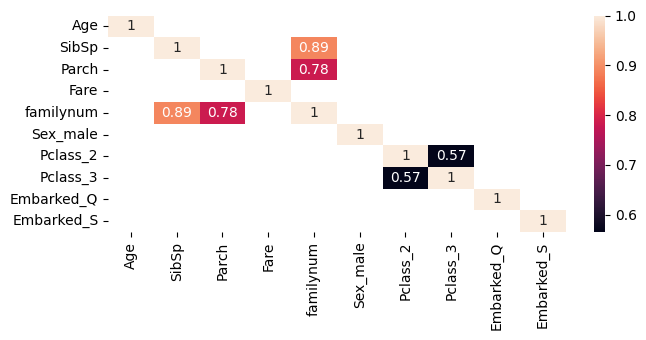

In [29]:
mask = x.corr().abs()<0.5
sns.heatmap(x.corr().abs(),annot=True,mask=mask)
plt.show()

可以发现sibsp和familynum存在较高相关性，相关系数为0.89，因此需要删除其中一个，我们对同乘家庭成员是否会影响幸存概率感兴趣，所以保留FamilyNum。

此外parch和familynum也存在较高相关性，相关系数为0.78，因此需要删除其中一个。

综上所述，需要删除sibsp和parch这两个变量

In [30]:
x = x.drop(['SibSp','Parch'],axis=1)
x

,Age,Fare,familynum,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,22.000000,7.2500,1,1,0,1,0,1
1,38.000000,71.2833,1,0,0,0,0,0
2,26.000000,7.9250,0,0,0,1,0,1
3,35.000000,53.1000,1,0,0,0,0,1
4,35.000000,8.0500,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...
886,27.000000,13.0000,0,1,1,0,0,1
887,19.000000,30.0000,0,0,0,0,0,1
888,29.699118,23.4500,3,0,0,1,0,1
889,26.000000,30.0000,0,1,0,0,0,0


接下来给自变量x添加截距

In [31]:
x = sm.add_constant(x)
x

,const,Age,Fare,familynum,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,1.0,22.000000,7.2500,1,1,0,1,0,1
1,1.0,38.000000,71.2833,1,0,0,0,0,0
2,1.0,26.000000,7.9250,0,0,0,1,0,1
3,1.0,35.000000,53.1000,1,0,0,0,0,1
4,1.0,35.000000,8.0500,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,1.0,27.000000,13.0000,0,1,1,0,0,1
887,1.0,19.000000,30.0000,0,0,0,0,0,1
888,1.0,29.699118,23.4500,3,0,0,1,0,1
889,1.0,26.000000,30.0000,0,1,0,0,0,0


下一步调用logic模型进行回归分析

In [32]:
result = sm.Logit(y,x).fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.440917
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      882
Method:                           MLE   Df Model:                            8
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.3379
Time:                        10:28:28   Log-Likelihood:                -392.86
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.179e-81
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0970      0.476      8.606      0.000       3.164       5.030
Age           -0.0385      0.008     -4.903      0.000      -0.054      -0.023
Fare           0.0025      0.002      0.994      0.320      -0.002       0.007
familynum     -0.2211      0.068     -3.230      0.001      -0.355      -0.087
Sex_male      -2.7335      0.200    -13.647      0.000      -3.126      -2.341
Pclass_2      -0.9031      0.297     -3.043      0.002      -1.485      -0.321
Pclass_3      -2.1336      0.297     -7.178      0.000      -2.716      -1.551
Embarked_Q    -0.0680      0.380     -0.179      0.858      -0.813       0.677
Embarked_S    -0.4684      0.239     -1.960      0.050      -0.937      -0.000
==============================================================================
"""

设定显著性水平为0.05
Fare,Embarked_Q	,Embarked_S	的p值都大于大于0.05，因此对这3个变量进行移除，再进行逻辑回归。

In [33]:
x = x.drop(['Fare','Embarked_Q','Embarked_S'],axis =1)
model = sm.Logit(y,x).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.444623
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.3323
Time:                        10:28:28   Log-Likelihood:                -396.16
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 4.927e-83
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0620      0.404     10.049      0.000       3.270       4.854
Age           -0.0395      0.008     -5.065      0.000      -0.055      -0.024
familynum     -0.2186      0.065     -3.383      0.001      -0.345      -0.092
Sex_male      -2.7854      0.198    -14.069      0.000      -3.173      -2.397
Pclass_2      -1.1798      0.261     -4.518      0.000      -1.692      -0.668
Pclass_3      -2.3458      0.242     -9.676      0.000      -2.821      -1.871
==============================================================================
"""

逻辑回归模型预测以下因素的增加（或存在）会降低幸存概率：年龄、同乘家庭成员数、不在一等舱、性别为男性。

要理解各个各个自变量系数的实际含义，我们需要计算自然常数的次方。

In [34]:
print(np.exp(-0.0395))
print(np.exp(-0.2186))
print(np.exp(-2.7854))
print(np.exp(-1.1798))
print(np.exp(-2.3458))

0.9612699539905982
0.803643111115195
0.061704402333015156
0.30734020049483596
0.09577055503172162


综上，
年龄每增加1岁，幸存概率减低0.4左右。  
同乘家庭成员每增加1个，幸存概率减低0.2左右。  
性别为男性的幸存概率为女性的0.06倍左右，概率比女性低了约94%  
船舱等级每增加一级，幸存概率越低，即幸存概率一等舱>二等舱>三等舱
 
  
前两条背后的原因可能与泰坦尼克号沉船后逃生时，“让孩子和女性先走”的原则。第三条说明可能当时舱位更尊贵的乘客拥有了优先逃生的机会。第四条可能是因为拥有较大数量家庭成员的乘客在灾难发生时会急于解救其他家庭成员而非选择逃生，最后也失去了自己逃生的机会


得到模型后，我们将用于预测titianic_test.csv里泰坦尼克号乘客的生还情况。

首先读取titianic_test.csv的数据。

In [35]:
titanic_test = pd.read_csv('titanic_test.csv')
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S



由于逻辑回归模型不允许数据中有缺失值，因此我们需要检查titanic_test是否存在数据缺失。

In [36]:
titanic_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


 Age,Fare,Cabin存在缺失。
其中Fare,Cabin不属于逻辑回归模型中的自变量，因此可以忽略。而Age可以用其平均值来填补。

In [37]:
test_Age_mean=titanic_test['Age'].mean()
titanic_test['Age']=titanic_test['Age'].fillna(test_Age_mean)
titanic_test['Age'].isna().sum()

0

下一步是给模型中的分类变量引入虚拟变量，但在引入前我们需要先把分类变量的类型转换为Category，并且通过categories参数，让程序知道所有可能的分类值。这样做的原因是，预测数据包含的分类可能不全。我们需要确保引入虚拟变量的时候，不会漏掉某个或某些分类。

In [38]:
titanic_test['Pclass'] = pd.Categorical(titanic_test['Pclass'],categories=['1','2','3'])
titanic_test['Sex'] = pd.Categorical(titanic_test['Sex'],categories=['female','male'])

In [39]:
titanic_test = pd.get_dummies(titanic_test,columns=['Pclass','Sex'],dtype=int,drop_first=True)

In [40]:
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0


In [41]:
model.params

const        4.061982
Age         -0.039495
familynum   -0.218627
Sex_male    -2.785398
Pclass_2    -1.179763
Pclass_3    -2.345823
dtype: float64

titanic_test中没有familynum这列变量，需要添加。
familynum=SibSp+Parch

In [42]:
titanic_test['familynum']=titanic_test['SibSp']+titanic_test['Parch']
titanic_test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,familynum
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,0,0,1,0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,0,1,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,0,0,2


接下来构建我们要输入给模型进行预测的变量，需要和模型训练时的输入一致。

In [43]:
x_test = titanic_test[['Age', 'familynum','Sex_male', 'Pclass_2', 'Pclass_3']]
x_test = sm.add_constant(x_test)

进行预测

In [45]:
predicted_value = model.predict(x_test)
predicted_value

0      0.478514
1      0.879434
2      0.236473
3      0.552361
4      0.940242
         ...   
413    0.520230
414    0.925647
415    0.439306
416    0.520230
417    0.411858
Length: 418, dtype: float64

我们获得了逻辑回归模型预测的titanic_test.csv里，泰坦尼克号乘客的幸存概率。我们可以把概率大于等于0.5的预测为幸存，小于0.5的预测为遇难，输出一下这个最终的预测结果。

In [46]:
print(predicted_value>0.5)

0      False
1       True
2      False
3       True
4       True
       ...  
413     True
414     True
415    False
416     True
417    False
Length: 418, dtype: bool
